In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import sqlite3

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score

import pydotplus
from IPython.display import Image

from itertools import cycle

from __future__ import division
from datetime import datetime
%matplotlib inline

/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
cars = pd.read_csv("04cars.csv")

In [3]:
cars.head()

,Type,Retailprice,Sport,SUV,Wagon,Minivan,Pickup,Engine,Cylinders,Horsepower,CityMPG,HwyMPG,Weight,Wheelbase,Length,Height
0,Other,10280,0,0,0,0,0,1.6,4.0,104,26.0,33.0,2403.0,95.0,167.0,66
1,Other,10539,0,0,0,0,0,1.6,4.0,103,29.0,33.0,2255.0,96.0,167.0,66
2,Other,10760,0,0,0,0,0,1.5,4.0,108,35.0,43.0,2035.0,93.0,163.0,65
3,Other,10995,0,0,0,0,0,2.2,4.0,140,26.0,35.0,2692.0,103.0,185.0,67
4,Other,11155,0,0,0,0,0,1.6,4.0,104,25.0,32.0,2458.0,95.0,167.0,66


In [4]:
print(cars.info())
cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 16 columns):
Type           428 non-null object
Retailprice    428 non-null int64
Sport          428 non-null int64
SUV            428 non-null int64
Wagon          428 non-null int64
Minivan        428 non-null int64
Pickup         428 non-null int64
Engine         428 non-null float64
Cylinders      426 non-null float64
Horsepower     428 non-null int64
CityMPG        414 non-null float64
HwyMPG         414 non-null float64
Weight         426 non-null float64
Wheelbase      426 non-null float64
Length         402 non-null float64
Height         402 non-null object
dtypes: float64(7), int64(7), object(2)
memory usage: 53.6+ KB
None


,Retailprice,Sport,SUV,Wagon,Minivan,Pickup,Engine,Cylinders,Horsepower,CityMPG,HwyMPG,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,426.000000,428.000000,414.000000,414.000000,426.000000,426.000000,402.000000
mean,32774.855140,0.114486,0.140187,0.070093,0.046729,0.056075,3.196729,5.807512,215.885514,20.089372,26.905797,3577.213615,108.173709,185.126866
std,19431.716674,0.318773,0.347587,0.255603,0.211305,0.230335,1.108595,1.558443,71.836032,5.213062,5.696804,760.437663,8.326449,13.312523
min,10280.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,177.000000
50%,27635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,186.000000
75%,39205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000,6.000000,255.000000,21.000000,29.000000,3974.250000,112.000000,193.000000
max,192465.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,227.000000


In [25]:
#import pivottablels
import missingno as msno
#cars.nullity_filter

ImportError: No module named 'missingno'

In [29]:
for col in cars_.columns:
    if cars_[col].isnull().any():
        print(cars_[col])
    else: 
        print("")

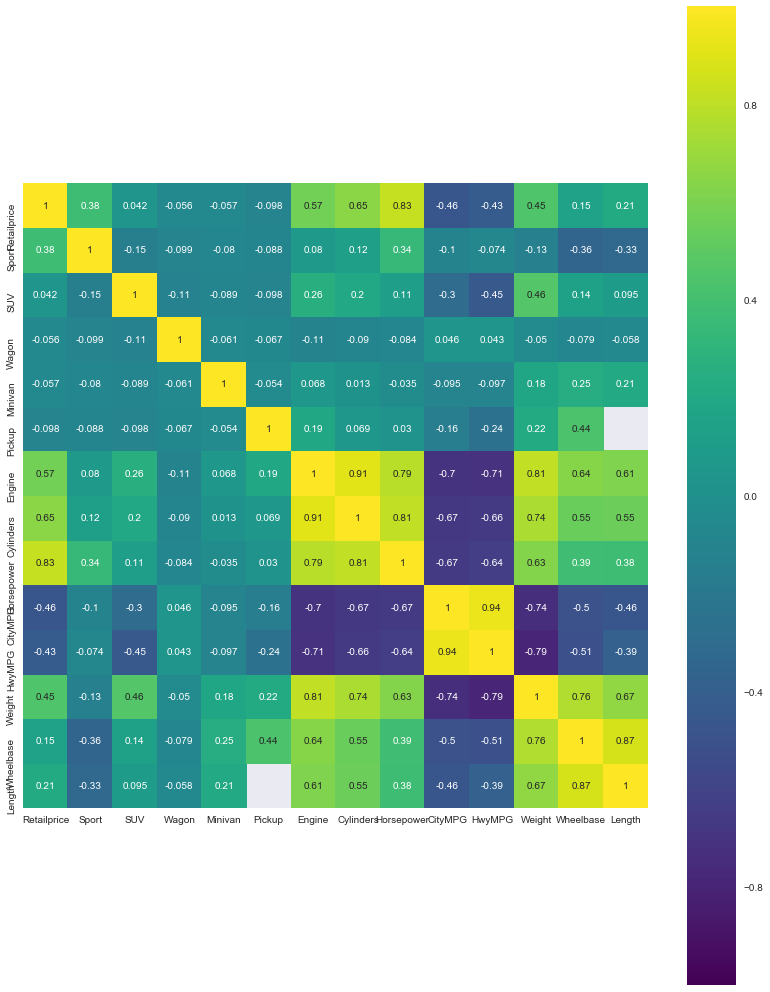

In [6]:
correlation =cars.corr()
plt.figure(figsize = (14,18))
sns.heatmap(correlation, vmax= 1, square= True, annot= True, cmap="viridis")

In [28]:
from numpy import nan as NA
cars_ = cars.fillna(method="ffill")

In [32]:
# Cleaned using forward-fill
cars_.isnull().any()

Type           False
Retailprice    False
Sport          False
SUV            False
Wagon          False
Minivan        False
Pickup         False
Engine         False
Cylinders      False
Horsepower     False
CityMPG        False
HwyMPG         False
Weight         False
Wheelbase      False
Length         False
Height         False
dtype: bool

In [34]:
train, test = train_test_split(cars_, test_size= .25, random_state=1)

train_x= train.drop(['Retailprice'], axis=1)
test_x= test.drop(['Retailprice'], axis=1)
train_y = train['Retailprice']
test_y = test['Retailprice']